CSCE 5214 asignment 1

Author: Thai Ha Dang

Student ID: 11741833

# Task 1: Data preparation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Function to read the data from the file (copy from provided code)
def getData(filename):
    canData=[] #List to store CAN data
    f = open(filename)
    #read_file = reader(f)
    read_file =f.readlines()
    #file = list(read_file)
    speed = []
    rpm = []
    i = 0
    for row in read_file:
        #Change the positions of the values if needed
        record = {'stamp':row[1:18], 'PID':row[25:28], 'const1':row[29:33],'change':row[33:41],'value':int(row[41:45], 16), 'value2':0 ,'attack':0}
        
        if record["PID"] == '254': #Processing of speed
            if record["value"] >= 4095:
                record["attack"] = 1
            record['value'] =  (record['value'] * 0.62137119) /100
            speed.append(record['value'])
        
        if record["PID"] == '115': #Processing of RPM 
            if record["value"] >= 65535:
                record["attack"] = 1
            record['value'] =  (record['value'] * 2)
            rpm.append(record['value'])

        i = i+1   
        canData.append(record)
        record={}
    f.close()
    return canData

In [3]:
# convert dictionary to dataframe (copy from provided code)
def dict_to_df(dict):
    #load dictionary to dataframe
    df = pd.DataFrame.from_dict(dict)
    df = df.drop(columns=['stamp','const1','change','value2'])
    df = df.loc[(df['PID'] == '115') | (df['PID'] == '254')]
    df = df.reset_index(drop=True)
    one_hot = pd.get_dummies(df['PID'])
    df = df.drop('PID',axis = 1)
    df = df.join(one_hot)
    df = df[['115', '254', 'value', 'attack']]
    df.rename(columns = {'115':'RPM', '254':'Speed'}, inplace = True)
    df.loc[df['RPM'] == 1, 'RPM'] = df['value']
    df.loc[df['Speed'] == 1, 'Speed'] = df['value']
    df = df.drop(columns=['value'])
    return df

In [4]:

fff_injection_path = "CAN Bus log/CAN Bus log - injection of FFF as the speed reading.log"
rpm_injection_path = "CAN Bus log/CAN Bus log - injection of RPM readings.log"
no_injection_path = "CAN Bus log/CAN bus log - no injection of messages.log"

fff_injection_df = dict_to_df(getData(fff_injection_path))
rpm_injection_df = dict_to_df(getData(rpm_injection_path))
no_injection_df = dict_to_df(getData(no_injection_path))

C:\Users\hadan\AppData\Local\Temp\ipykernel_6052\4253190092.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[626. 624. 624. ... 900. 906. 906.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['RPM'] == 1, 'RPM'] = df['value']
C:\Users\hadan\AppData\Local\Temp\ipykernel_6052\4253190092.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.          0.          0.         ... 25.44515023 25.44515023
 25.44515023]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Speed'] == 1, 'Speed'] = df['value']
C:\Users\hadan\AppData\Local\Temp\ipykernel_6052\4253190092.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[   740.    742.    744. ..

In [5]:
fff_injection_df

,RPM,Speed,attack
0,626.0,False,0
1,False,0.0,0
2,624.0,False,0
3,False,0.0,0
4,624.0,False,0
...,...,...,...
14430,False,5.486708,0
14431,False,25.44515,1
14432,False,25.44515,1
14433,906.0,False,0


# Task 2:  Explore and analyze the data

## Step 1

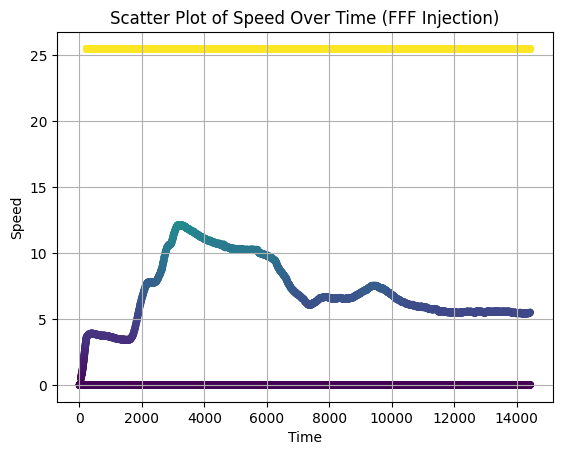

In [6]:
#Scatter plot Scatter Plot of Speed Over Time (FFF Injection)
fff_injection_df['time']=fff_injection_df.index
fff_injection_df.plot.scatter(x='time',y='Speed',c='Speed')
plt.title('Scatter Plot of Speed Over Time (FFF Injection)')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.grid()
plt.show()


Text(0.5, 1.0, 'Scatter Plot of RPM Over Time (FFF Injection)')

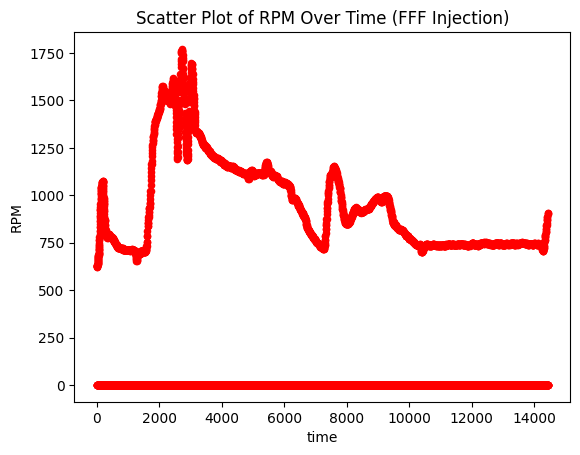

In [7]:
#Scatter Plot of RPM Over Time (FFF Injection)
fff_injection_df.plot.scatter(x='time',y='RPM', c='r')
plt.title('Scatter Plot of RPM Over Time (FFF Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Speed (FFF Injection)')

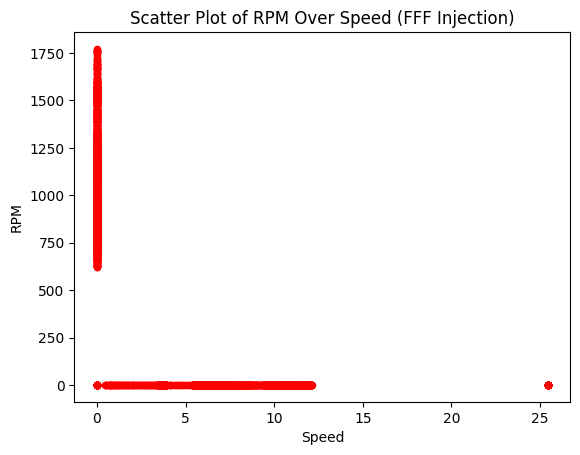

In [8]:
#Scatter Plot of RPM Over Speed (FFF Injection)
fff_injection_df.plot.scatter(x='Speed',y='RPM', c='r')
plt.title('Scatter Plot of RPM Over Speed (FFF Injection)')

Text(0.5, 1.0, 'Scatter Plot of Speed Over Time (RPM Injection)')

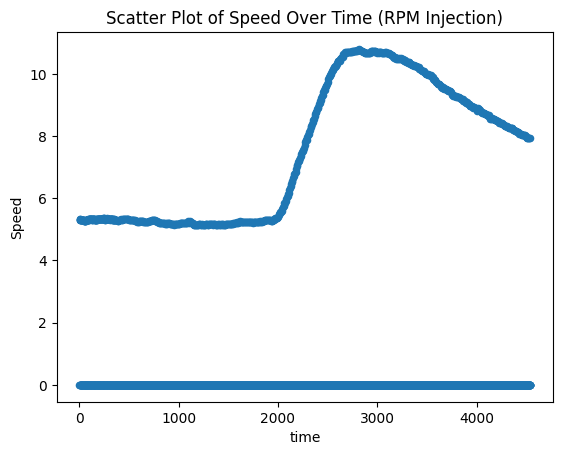

In [9]:
#Scatter Plot of Speed Over Time (RPM Injection)
rpm_injection_df['time']=rpm_injection_df.index
rpm_injection_df.plot.scatter(x='time',y='Speed')
plt.title('Scatter Plot of Speed Over Time (RPM Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Time (RPM Injection)')

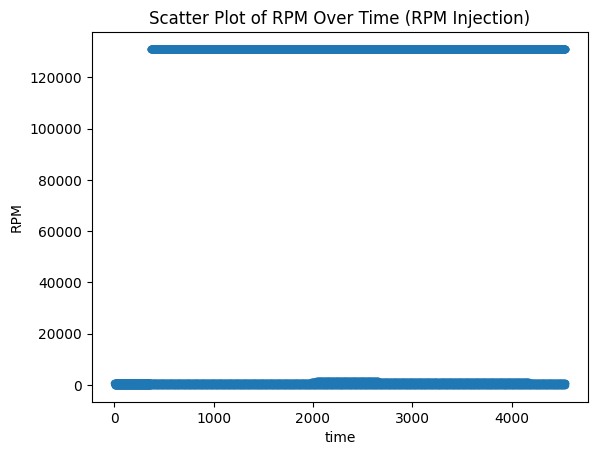

In [10]:
#Scatter Plot of RPM Over Time (RPM Injection)
rpm_injection_df.plot.scatter(x='time',y='RPM')
plt.title('Scatter Plot of RPM Over Time (RPM Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Speed (RPM Injection)')

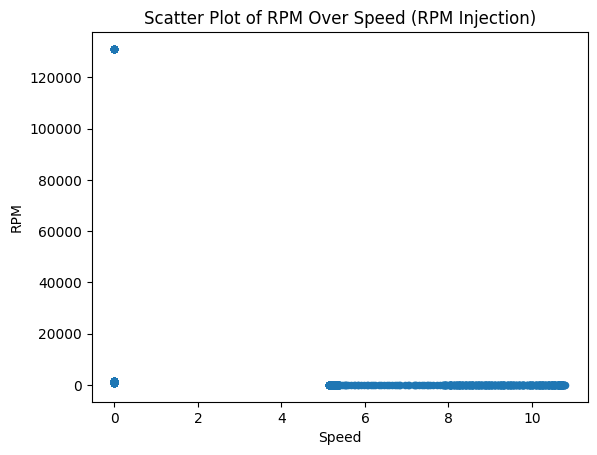

In [11]:
#Scatter Plot of RPM Over Speed (RPM Injection)
rpm_injection_df.plot.scatter(x='Speed',y='RPM')
plt.title('Scatter Plot of RPM Over Speed (RPM Injection)')

Text(0.5, 1.0, 'Scatter Plot of Speed Over Time (No Injection)')

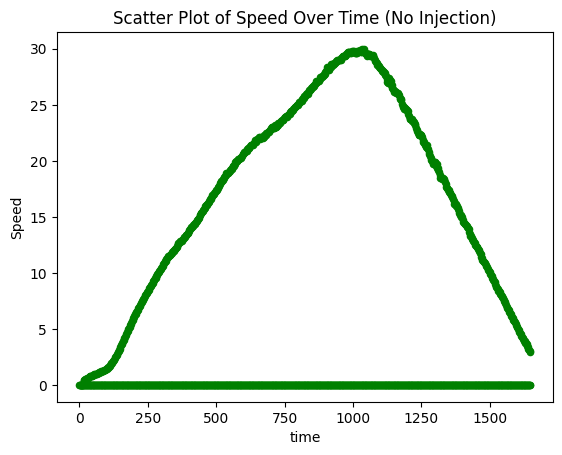

In [12]:
#Scatter Plot of Speed Over Time (No Injection)
no_injection_df['time']=no_injection_df.index
no_injection_df.plot.scatter(x='time',y='Speed',c='g')
plt.title('Scatter Plot of Speed Over Time (No Injection)')

Text(0.5, 1.0, 'Scatter Plot of Time Over RPM (No Injection)')

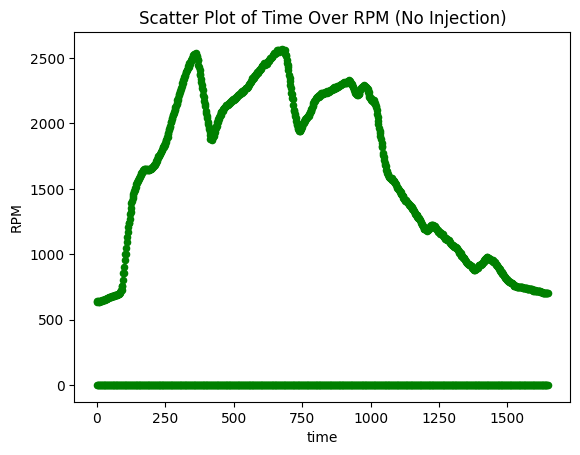

In [13]:
#Scatter Plot of Time Over RPM (No Injection)
no_injection_df.plot.scatter(x='time',y='RPM', c='g')
plt.title('Scatter Plot of Time Over RPM (No Injection)')

Text(0.5, 1.0, 'Scatter Plot of RPM Over Speed (No Injection)')

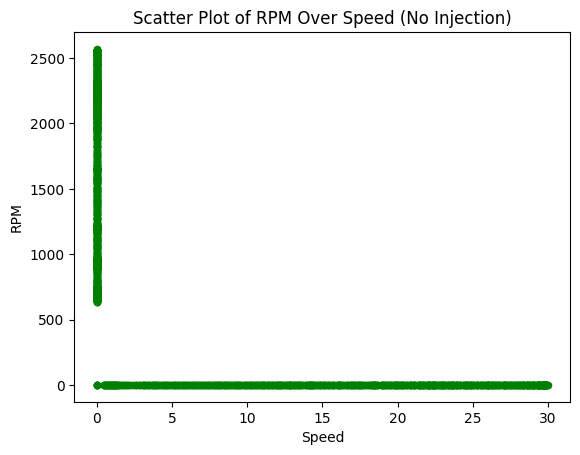

In [14]:
#Scatter Plot of RPM Over Speed (No Injection)
no_injection_df.plot.scatter(x='Speed',y='RPM', c='g')
plt.title('Scatter Plot of RPM Over Speed (No Injection)')

**observations**

1. **Change of Speed Over Time**:
   - In the FFF injection graph, we see that speed readings show some fluctuations. These could be due to the injection of false data.
   - In the RPM Injection graph, there are also fluctuations, but they appear to be very less when compared to FFF Injection graph.
   - In the No Injection graph, speed readings are relatively stable. This indicates normal vehicle operation with minimal fluctuations.

2. **Change of RPM Over Time**:
   - In the FFF Injection graph, RPM readings show few variations, which may be occurred due to the presence of false data.
   - In the RPM Injection graph, RPM readings show fluctuations as well, but they appear to be less severe and more regular compared to the FFF Injection graph.
   - In the No Injection scenario, RPM readings remain relatively stable. This indicates typical engine operation with minor variations.

3. **Relationship Between Speed and RPM**:
   - In all three scenarios, the scatter plots of speed vs. RPM reveal a positive linear relationship between these two parameters. As speed increases, RPM tends to increase as well, which is consistent with the behavior of a typical vehicle engine.
   - However, in the FFF Injection and RPM Injection scenarios, there are noticeable outliers and disruptions in the linear relationship. These anomalies likely correspond to the injection of false data.
   - In the No Injection scenario, the speed vs. RPM plot shows a smoother and more consistent linear relationship, reflecting normal vehicle behavior without external interference.

## step 2

In [15]:
fff_injection_df


,RPM,Speed,attack,time
0,626.0,False,0,0
1,False,0.0,0,1
2,624.0,False,0,2
3,False,0.0,0,3
4,624.0,False,0,4
...,...,...,...,...
14430,False,5.486708,0,14430
14431,False,25.44515,1,14431
14432,False,25.44515,1,14432
14433,906.0,False,0,14433


Text(0.5, 0, 'time')

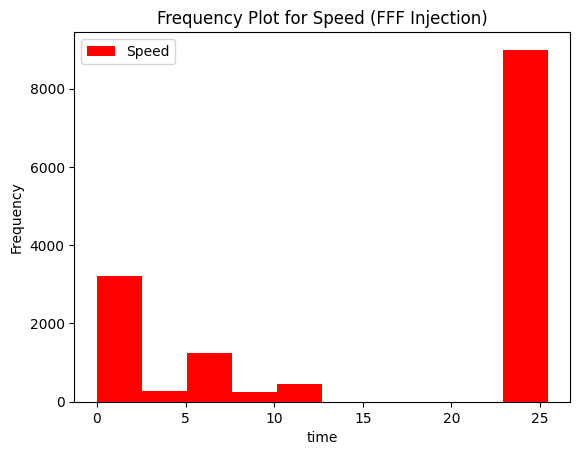

In [17]:
#Frequency Plot for Speed (FFF Injection)
fff_injection_df['Speed'] = pd.to_numeric(fff_injection_df['Speed'], errors='coerce')
fff_injection_df.plot.hist(y='Speed', color='red')
plt.title('Frequency Plot for Speed (FFF Injection)')
plt.xlabel('time')

Text(0.5, 1.0, 'Frequency Plot for RPM (FFF Injection)')

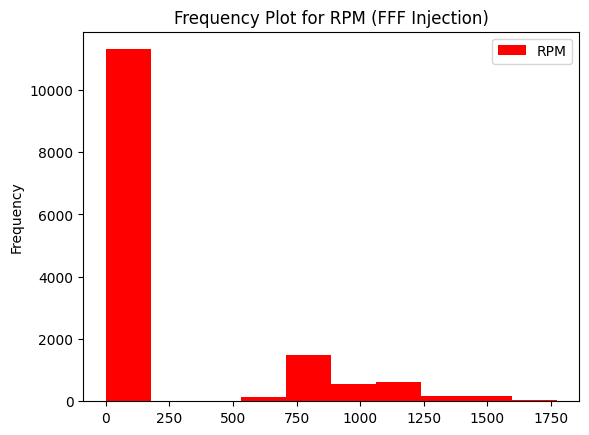

In [18]:
#Frequency Plot for Speed (FFF Injection)
fff_injection_df['RPM'] = pd.to_numeric(fff_injection_df['RPM'], errors='coerce')
fff_injection_df.plot.hist(y='RPM', color='red')
plt.title('Frequency Plot for RPM (FFF Injection)')



Text(0.5, 1.0, 'Frequency Plot for Speed (RPM Injection)')

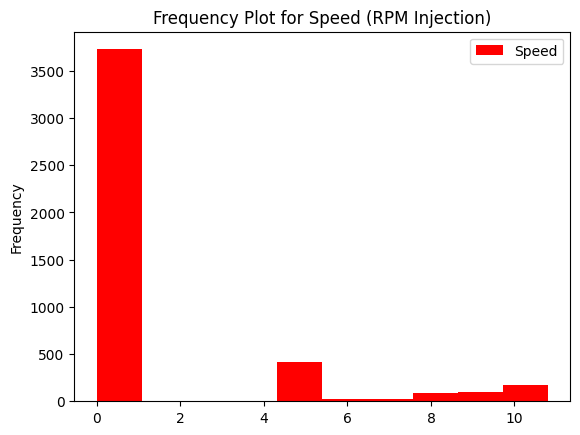

In [19]:
#Frequency Plot for Speed (RPM Injection)
rpm_injection_df['Speed'] = pd.to_numeric(rpm_injection_df['Speed'], errors='coerce')
rpm_injection_df.plot.hist(y='Speed', color='red')
plt.title('Frequency Plot for Speed (RPM Injection)')


Text(0.5, 1.0, 'Frequency Plot for RPM (RPM Injection)')

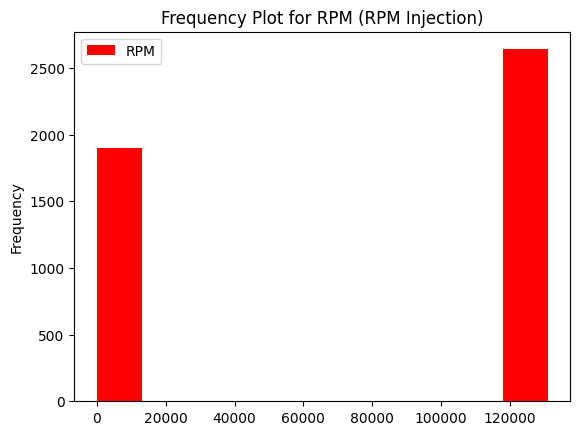

In [20]:
#Frequency Plot for RPM (RPM Injection)
rpm_injection_df['RPM'] = pd.to_numeric(rpm_injection_df['RPM'], errors='coerce')
rpm_injection_df.plot.hist(y='RPM', color='red')
plt.title('Frequency Plot for RPM (RPM Injection)')


Text(0.5, 1.0, 'Frequency Plot for Speed (No Injection)')

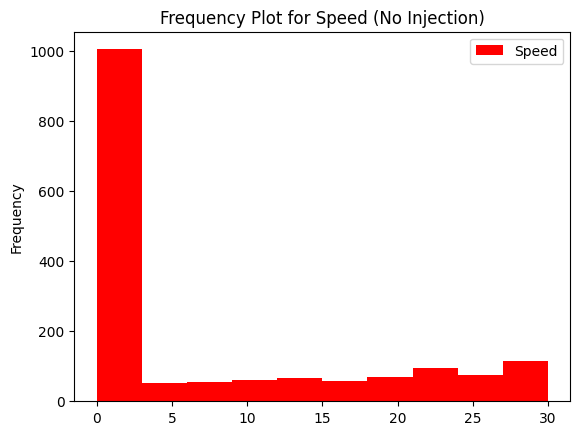

In [21]:
#Frequency Plot for Speed (RPM Injection)
no_injection_df['Speed'] = pd.to_numeric(no_injection_df['Speed'], errors='coerce')
no_injection_df.plot.hist(y='Speed', color='red')
plt.title('Frequency Plot for Speed (No Injection)')
#Frequency Plot for RPM (RPM Injection)

Text(0.5, 1.0, 'Frequency Plot for RPM (No Injection)')

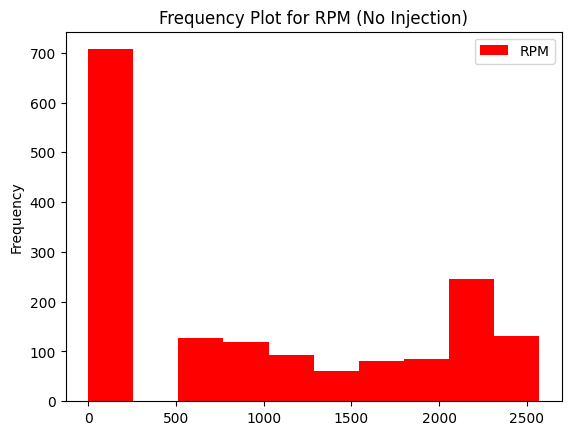

In [22]:
#Frequency Plot for Speed (No Injection)
no_injection_df['RPM'] = pd.to_numeric(no_injection_df['RPM'], errors='coerce')
no_injection_df.plot.hist(y='RPM', color='red')
plt.title('Frequency Plot for RPM (No Injection)')


In [23]:
#dropping the time columns as we do not require them for training the ML models
fff_injection_df = fff_injection_df.drop(columns=['time'])
rpm_injection_df = rpm_injection_df.drop(columns=['time'])
no_injection_df = no_injection_df.drop(columns=['time'])


## Step 3

In [24]:
# Correlation Table
from scipy.stats import pearsonr
corr_fffi = pearsonr(fff_injection_df['Speed'], fff_injection_df['RPM'])
corr_rpmi = pearsonr(rpm_injection_df['Speed'], rpm_injection_df['RPM'])
corr_noi = pearsonr(no_injection_df['Speed'], no_injection_df['RPM'])


correlation_table = pd.DataFrame({
    'Scenario': ['FFF Injection', 'RPM Injection', 'No Injection'],
    'Correlation Coefficient': [corr_fffi[0], corr_rpmi[0], corr_noi[0]],
    'P-Value': [corr_fffi[1], corr_rpmi[1], corr_noi[1]]
})


print(correlation_table)

        Scenario  Correlation Coefficient        P-Value
0  FFF Injection                -0.768675   0.000000e+00
1  RPM Injection                -0.526325  3.162020e-322
2   No Injection                -0.704439  1.700339e-247


In [25]:
#Combined data set from three data frames
combined_dataset = pd.concat([fff_injection_df, rpm_injection_df, no_injection_df], ignore_index=True)

In [26]:
#Splitting the data set into train(3/4th) and test(1/4th).
from sklearn.model_selection import train_test_split

X = combined_dataset[['Speed', 'RPM']]  #Input variables
y = combined_dataset['attack']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Predict on the test dataset
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print("\n")
# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Confusion Matrix:
[[2212    0]
 [   0 2945]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2212
           1       1.00      1.00      1.00      2945

    accuracy                           1.00      5157
   macro avg       1.00      1.00      1.00      5157
weighted avg       1.00      1.00      1.00      5157



# task 4

In [29]:
# Create and train the Logistic Regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [30]:
# Predict on the test dataset
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print("\n")
# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[2207    5]
 [   0 2945]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2212
           1       1.00      1.00      1.00      2945

    accuracy                           1.00      5157
   macro avg       1.00      1.00      1.00      5157
weighted avg       1.00      1.00      1.00      5157

